# Perceptron Learning Algorithm

## 1. Create Dataset

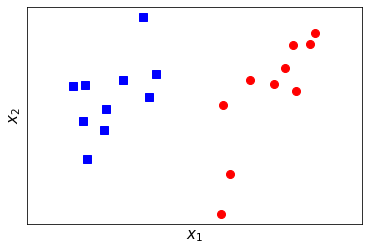

In [4]:
import numpy as np 
import matplotlib.pyplot as plt


np.random.seed(22)

means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)


plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8)
plt.axis('equal')

plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)

cur_axes = plt.gca() #get current axes
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])


plt.show()

## 2. Optimize Loss Function

    label(x) = 1  if w.T * x >= 0
             = -1 if w.T * x < 0
    label(x) = sgn(w.T * x)
    miss classified loss function:
        J(w) = (-y * sgn(w.T * x))  ##sign only
     => J(w) = (-y * w.T * x)       ##include distance
 
    Optimize: 
        dJ(w)/dw = -y * x
     => w <- w - n(-y * x)
     at PLA n = 1
     
   **=>w <- w + y * x**

In [5]:
def predict(w, X):
    return np.sign(X.dot(w))

def PLA(X, y, w_init):
    w = [w_init]
    for it in range(10000):
        pred = predict(w[-1], X)
        mis_idxs = np.where(np.equal(pred, y) == False)[0] #find indexes of missclassified
        num_miss = mis_idxs.shape[0]
        if num_miss == 0:
            break
        random_id = np.random.choice(mis_idxs, 1)[0]
        w_new = w[-1] + y[random_id]*X[random_id]
        w.append(w_new)
    return w, it     

In [8]:
X = np.concatenate((X0, X1), axis = 0)
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
y = np.concatenate((np.ones(N), -1*np.ones(N)), axis = 0)

w_init = np.random.randn(Xbar.shape[1])
w1, it1 = PLA(Xbar, y, w_init)
it1

4

## 3. Draw Result

In [21]:
def draw_line(plt, w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')
    
def draw(X0, X1, w, ids, nrows = 2, ncols = 4):
    width = 3*ncols
    height = 3*nrows
    fig,axs=plt.subplots(nrows, ncols, figsize=(width, height))
    for i, k in enumerate(ids):
        r = i//ncols
        c = i%ncols

        str0 = 'iter={}/{}'.format(ids[i], len(w) - 1)
        #if nrows > 1:
        axs[r, c].plot(X0[:, 0], X0[:, 1], 'bs', markersize = 5)
        axs[r, c].plot(X1[:, 0], X1[:, 1], 'ro', markersize = 5)
        axs[r, c].set_title(str0)
        
        draw_line(axs[r, c], w[k])
        
        axs[r, c].axis([-2 , 2, -2, 1])
        axs[r, c].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        axs[r, c].plot()

    plt.show()

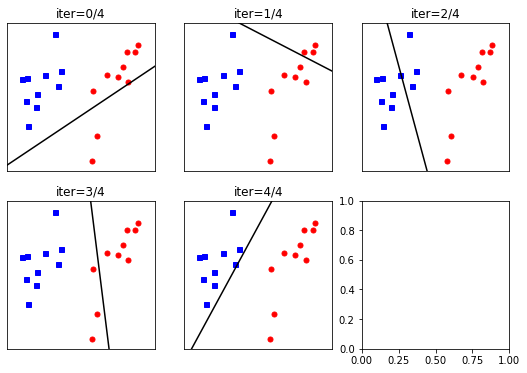

In [22]:
ids = [0, 1, 2, 3, 4]
draw(X0, X1, w1, ids, 2, 3)